## IMPORTING LIBRARIES


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from ggplot import *

%matplotlib inline

**Reading data from the csv**

In [2]:
wined = pd.read_csv('winequalityN.csv')

In [3]:
wined.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wined['wines_quality'] = wined.quality.apply(lambda x: 'L' if x<=5 else 'M' if x<=7 else 'H' )

In [5]:
wined.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wines_quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,M
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,M
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,M
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,M
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,M


## EDA - Exploratory data analysis

**Data Cleaning**

In [37]:
wined['wines_quality'].value_counts()

M    3894
L    2372
H     197
Name: wines_quality, dtype: int64

In [39]:
wined.dropna().wines_quality.value_counts()

M    3894
L    2372
H     197
Name: wines_quality, dtype: int64

<AxesSubplot:>

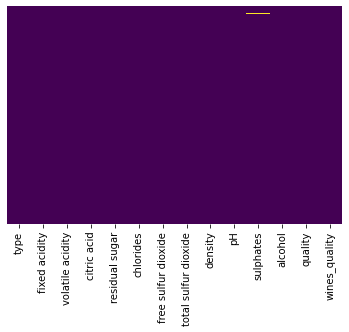

In [8]:
sns.heatmap(wined.isnull(),yticklabels=False,cbar= False,cmap='viridis')

In [9]:
wined.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
wines_quality            0
dtype: int64

In [10]:
wined['type'].unique()

array(['white', 'red'], dtype=object)

In [11]:
wined.dropna(inplace=True)

In [12]:
wined.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wines_quality           0
dtype: int64

<AxesSubplot:>

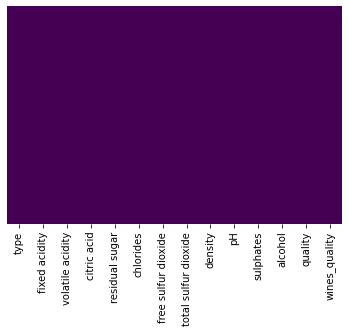

In [13]:
sns.heatmap(wined.isnull(),yticklabels=False,cbar= False,cmap='viridis')

**Data analysis**

In [14]:
wined['type'].unique()

array(['white', 'red'], dtype=object)

<AxesSubplot:xlabel='type', ylabel='count'>

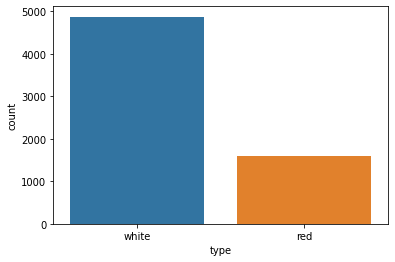

In [15]:
sns.countplot(x='type', data = wined)

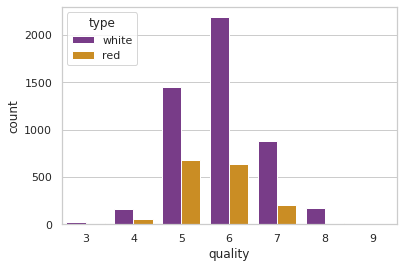

In [16]:
sns.set(style="whitegrid")
sns.countplot(wined["quality"],hue="type",data=wined,palette='CMRmap')
plt.show()

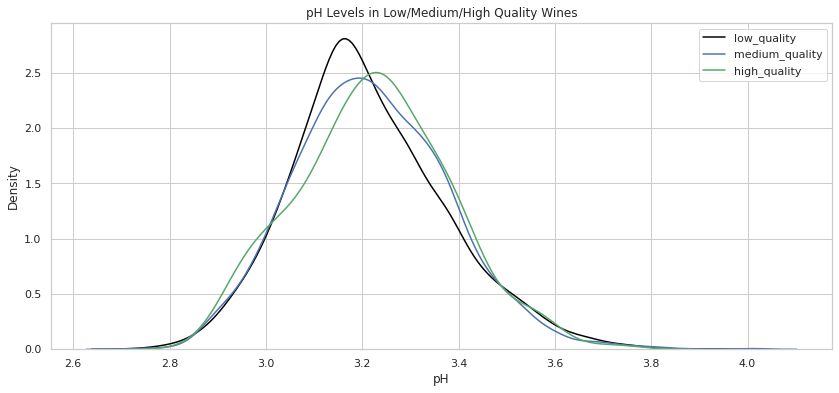

In [17]:
plt.figure(figsize=(14,6))

pH_low_quality  = wined[wined['wines_quality']== 'L']['pH']
pH_medium_quality  = wined[wined['wines_quality']== 'M']['pH']
pH_high_quality = wined[wined['wines_quality']== 'H'][ 'pH']
ax = sns.kdeplot(data= pH_low_quality, label= 'low_quality',color='black', shade=False) 
ax = sns.kdeplot(data= pH_medium_quality, label= 'medium_quality',color='b', shade=False) 
ax = sns.kdeplot(data= pH_high_quality,label= 'high_quality',color='g',   shade=False)

plt.title("pH Levels in Low/Medium/High Quality Wines")
plt.legend()
plt.show()

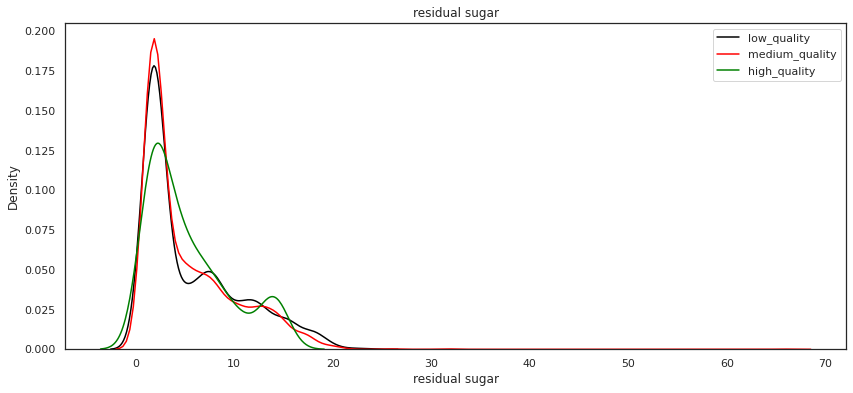

In [18]:
plt.figure(figsize=(14,6))
sns.set(style="white") 


low_quality  = wined[wined['wines_quality']== 'L']['residual sugar']
medium_quality  = wined[wined['wines_quality']== 'M']['residual sugar']
high_quality = wined[wined['wines_quality']== 'H'][ 'residual sugar']
ax = sns.kdeplot(data= low_quality, label= 'low_quality',color='black', shade=False) 
ax = sns.kdeplot(data= medium_quality, label= 'medium_quality',color='red', shade=False) 
ax = sns.kdeplot(data= high_quality,label= 'high_quality',color='green',   shade=False)

plt.title("residual sugar")
plt.legend()
plt.show()

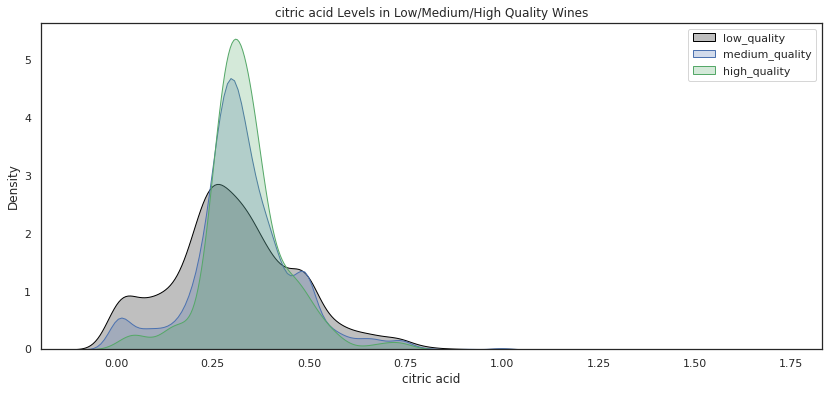

In [19]:
plt.figure(figsize=(14,6))

low_quality  = wined[wined['wines_quality']== 'L']['citric acid']
medium_quality  = wined[wined['wines_quality']== 'M']['citric acid']
high_quality = wined[wined['wines_quality']== 'H'][ 'citric acid']
ax = sns.kdeplot(data= low_quality, label= 'low_quality',color='black', shade=True) 
ax = sns.kdeplot(data= medium_quality, label= 'medium_quality',color='b', shade=True) 
ax = sns.kdeplot(data= high_quality,label= 'high_quality',color='g',   shade=True)

plt.title("citric acid Levels in Low/Medium/High Quality Wines")
plt.legend()
plt.show()

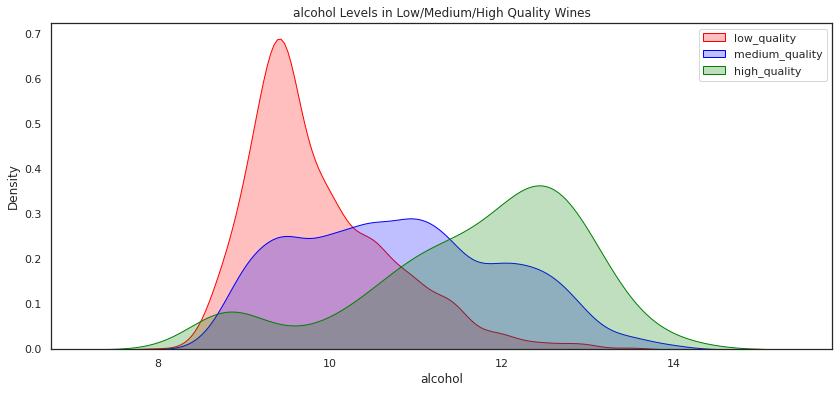

In [20]:
plt.figure(figsize=(14,6))
sns.set(style="white") 

low_quality  = wined[wined['wines_quality']== 'L']['alcohol']
medium_quality  = wined[wined['wines_quality']== 'M']['alcohol']
high_quality = wined[wined['wines_quality']== 'H'][ 'alcohol']
ax = sns.kdeplot(data= low_quality, label= 'low_quality',color='red', shade=True) 
ax = sns.kdeplot(data= medium_quality, label= 'medium_quality',color='blue', shade=True) 
ax = sns.kdeplot(data= high_quality,label= 'high_quality',color='green',   shade=True)

plt.title("alcohol Levels in Low/Medium/High Quality Wines")
plt.legend()
plt.show()

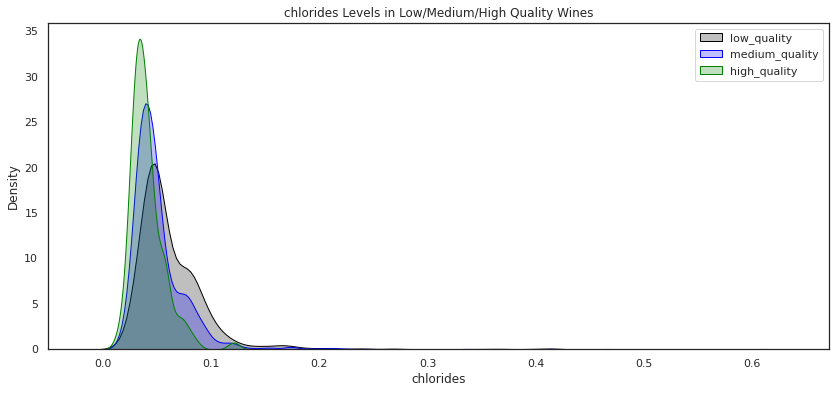

In [21]:
plt.figure(figsize=(14,6))
sns.set(style="white") 

low_quality  = wined[wined['wines_quality']== 'L']['chlorides']
medium_quality  = wined[wined['wines_quality']== 'M']['chlorides']
high_quality = wined[wined['wines_quality']== 'H'][ 'chlorides']
ax = sns.kdeplot(data= low_quality, label= 'low_quality',color='black', shade=True) 
ax = sns.kdeplot(data= medium_quality, label= 'medium_quality',color='blue', shade=True) 
ax = sns.kdeplot(data= high_quality,label= 'high_quality',color='green',   shade=True)

plt.title("chlorides Levels in Low/Medium/High Quality Wines")
plt.legend()
plt.show()

<AxesSubplot:xlabel='type', ylabel='alcohol'>

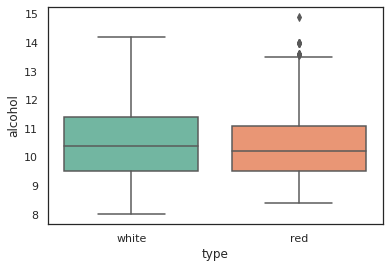

In [22]:
sns.boxplot(x="type", y="alcohol", data=wined, palette="Set2" )

<AxesSubplot:xlabel='type', ylabel='total sulfur dioxide'>

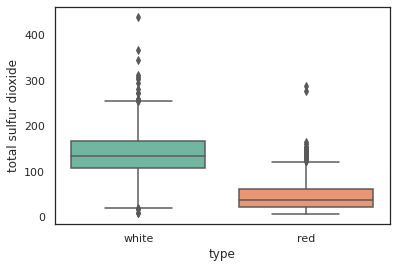

In [23]:
sns.boxplot(x="type", y="total sulfur dioxide", data=wined, palette="Set2" )

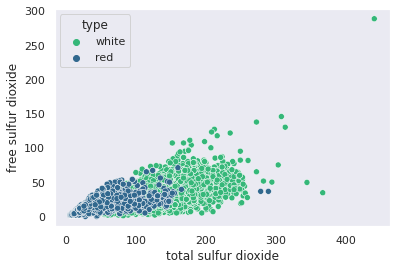

In [24]:
sns.set(style='dark')
ax = sns.scatterplot(x="total sulfur dioxide", y="free sulfur dioxide", hue='type',data=wined, palette='viridis_r')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

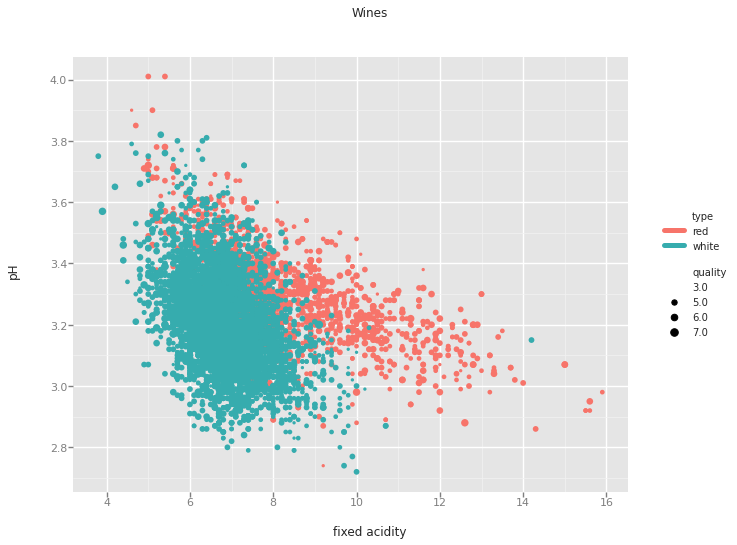

<ggplot: (-9223363262287279181)>

In [25]:
ggplot(wined, aes(x='fixed acidity', y='pH', 
    size = 'quality', color = 'type')) + geom_point() +  xlab("fixed acidity") + ylab("pH") + ggtitle("Wines")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

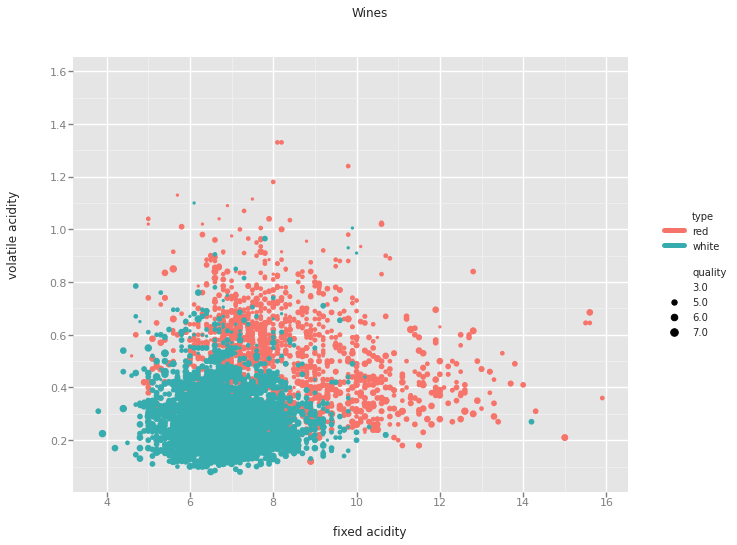

<ggplot: (-9223363262287200333)>

In [26]:
ggplot(wined, aes(x='fixed acidity', y='volatile acidity', 
    size = 'quality', color = 'type')) + geom_point() +  xlab("fixed acidity") + ylab("volatile acidity") + ggtitle("Wines")

<AxesSubplot:>

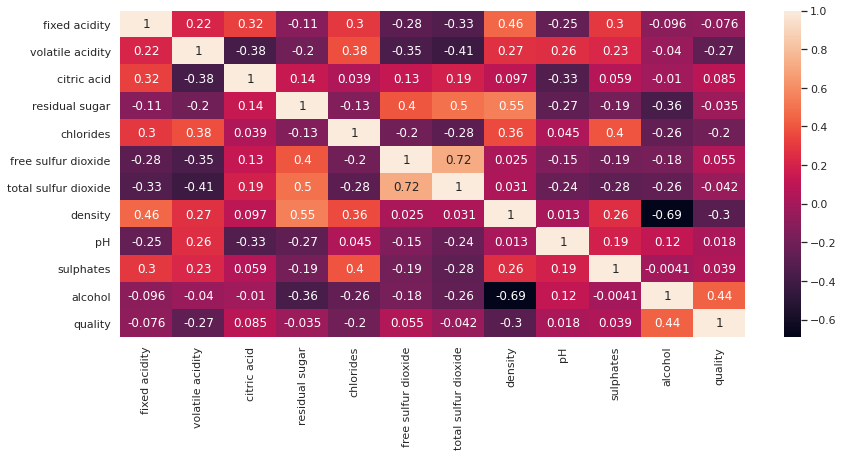

In [27]:
plt.figure(figsize=(14,6))
sns.heatmap(wined.corr(),annot=True)

In [28]:
wined.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


##  Training our model

**since our machine learning algorithm cannot read strings, we have to label encode**

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['white','red'])
wined['type'] = le.transform(wined['type'])

**splitting the data into train and test data**

In [30]:
from sklearn.model_selection import train_test_split
X = wined[['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y= wined['wines_quality']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

**training our K means clustering model**

In [31]:
from sklearn.linear_model import LogisticRegression 
logmodel = LogisticRegression()

In [32]:
logmodel = logmodel.fit(X_train,y_train)

**Predictions**

In [33]:
prediction = logmodel.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           H       0.00      0.00      0.00        67
           L       0.66      0.55      0.60       779
           M       0.72      0.83      0.77      1287

    accuracy                           0.70      2133
   macro avg       0.46      0.46      0.46      2133
weighted avg       0.67      0.70      0.68      2133



In [36]:
print(confusion_matrix(y_test,prediction))

[[   0    3   64]
 [   0  431  348]
 [   0  223 1064]]
